**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv(
    "data/semeval/train/anger-ratings-0to1.train.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
sadness_train = pd.read_csv(
    "data/semeval/train/sadness-ratings-0to1.train.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
fear_train = pd.read_csv(
    "data/semeval/train/fear-ratings-0to1.train.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
joy_train = pd.read_csv(
    "data/semeval/train/joy-ratings-0to1.train.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)

In [2]:
# combine 4 sub-dataset
train_df = pd.concat(
    [anger_train, fear_train, joy_train, sadness_train], ignore_index=True
)

In [3]:
### testing data
anger_test = pd.read_csv(
    "data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
sadness_test = pd.read_csv(
    "data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
fear_test = pd.read_csv(
    "data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)
joy_test = pd.read_csv(
    "data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
    sep="\t",
    header=None,
    names=["id", "text", "emotion", "intensity"],
)

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# imagine not using keyboard shortcuts
f"{train_df.shape}, {[a / b for a, b in zip(train_df.shape, test_df.shape)]}"


'(3613, 4), [10.412103746397694, 1.0]'

In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
train_df.head()

,id,text,emotion,intensity
349,10349,Forever angry that gh ruined Molly and morgan'...,anger,0.521
1516,20659,I have another test tonight,fear,0.438
3423,40596,Some #people already talks about #Halloween \n...,sadness,0.333
2167,30163,It's a beautiful day today. Cloudy but sunny a...,joy,0.673
3211,40384,The 2nd step to beating #anxiety or #depressio...,sadness,0.495


In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [8]:
# Answer here
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.feature_extraction.text import CountVectorizer


def top_n_plot(df: pd.DataFrame, n: int, title: str) -> go.Figure:
    count_vect = CountVectorizer()
    term_frequencies = np.asarray(
        count_vect.fit_transform(df["text"]).sum(axis=0)
    ).ravel()
    top_indices = term_frequencies.argsort()[-n:][::-1]
    return px.bar(
        pd.DataFrame(
            {
                "Top Words": count_vect.get_feature_names_out()[top_indices],
                "Frequency Count": term_frequencies[top_indices],
            }
        ),
        x="Top Words",
        y="Frequency Count",
        title=title,
    )


top_n_plot(train_df, 30, f"Top {30} in Training").show()
top_n_plot(test_df, 30, f"Top {30} in Testing").show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl")
test_df.to_pickle("./data/test_df.pkl")

In [10]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

In [11]:
# pickle can fail when you load a cache using a different version of Python
# why is the data platform-dependant?
# parquet can also be used to store dataframe

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [12]:
# group to find distribution
train_df.groupby(["emotion"]).count()["text"]

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

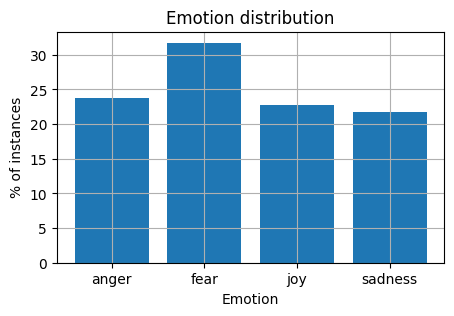

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df["emotion"].unique()
post_total = len(train_df)
df1 = train_df.groupby(["emotion"]).count()["text"]
df1 = df1.apply(lambda x: round(x * 100 / post_total, 3))

# plot
fig, ax = plt.subplots(figsize=(5, 3))
plt.bar(df1.index, df1.values)

# arrange
plt.ylabel("% of instances")
plt.xlabel("Emotion")
plt.title("Emotion distribution")
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [16]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df["text"])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df["text"])
test_data_BOW_features = BOW_vectorizer.transform(test_df["text"])

In [17]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [18]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [19]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [20]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [21]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [22]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [23]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df["text"])

train_data_BOW_features_500 = BOW_500.transform(train_df["text"])

## check dimension
train_data_BOW_features_500.shape

/home/df/repo/data-mining-course/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [24]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [25]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

In [26]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [27]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

(
    TfidfVectorizer(max_features=1000)
    .fit(train_df["text"])
    .get_feature_names_out()[100:110]
)

array(['bitch', 'bitter', 'black', 'blacks', 'blame', 'blessed', 'blood',
       'bloody', 'blues', 'body'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df["text"])
y_train = train_df["emotion"]

X_test = BOW_500.transform(test_df["text"])
y_test = test_df["emotion"]

## take a look at data dimension is a good habit  :)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'anger', 'fear', 'sadness', 'sadness', 'fear',
       'sadness', 'sadness', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print("training accuracy: {}".format(round(acc_train, 2)))
print("testing accuracy: {}".format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.65


In [31]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.66      0.68      0.67       110
         joy       0.67      0.67      0.67        79
     sadness       0.62      0.58      0.60        74

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [32]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[55 17  7  5]
 [14 75  9 12]
 [ 8  9 53  9]
 [ 9 12 10 43]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


def plot_confusion_matrix(
    cm, classes, title="Confusion matrix", cmap=sns.cubehelix_palette(as_cmap=True)
):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        xlabel="Predicted label",
        ylabel="True label",
    )

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -0.5])
    plt.tight_layout()
    plt.show()

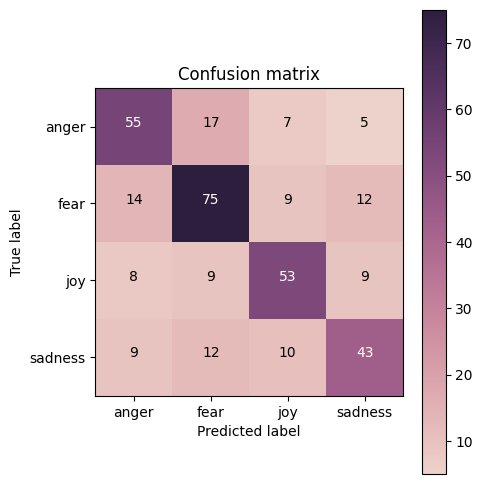

In [34]:
# plot your confusion matrix
my_tags = ["anger", "fear", "joy", "sadness"]
plot_confusion_matrix(cm, classes=my_tags, title="Confusion matrix")

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [35]:
# Answer here
from IPython.display import display, Markdown

display(
    Markdown("""
> The notebook only asked "What do they mean?", but the instruction video for completing this notebook on YouTube also asked for "insights". Therefore, the insights are also laid out below.
             
# What do they mean?

- The matrix provides a breakdown of the model's predictions for each emotion, mapping the predicted labels against the true labels
- The diagonal values is the number of correct predictions, while off-diagonal values correspond to misclassifications

# Insights

- The diagonal values are larger and the corresponding cells are darker (more concentrated), which is expected for a model that performs better than random chance
- Although the cell for correctly classified "fear" is the darkest (highest count), it is in fact not the "best-performing" class, because the absolute number of correct predictions isn't a good measure of performance
- "fear" and "anger" are more frequently confused with each other by the model than other emotion pairs
- The emotion that "joy" is most frequently confused with is "sadness"
""")
)


> The notebook only asked "What do they mean?", but the instruction video for completing this notebook on YouTube also asked for "insights". Therefore, the insights are also laid out below.

# What do they mean?

- The matrix provides a breakdown of the model's predictions for each emotion, mapping the predicted labels against the true labels
- The diagonal values is the number of correct predictions, while off-diagonal values correspond to misclassifications

# Insights

- The diagonal values are larger and the corresponding cells are darker (more concentrated), which is expected for a model that performs better than random chance
- Although the cell for correctly classified "fear" is the darkest (highest count), it is in fact not the "best-performing" class, because the absolute number of correct predictions isn't a good measure of performance
- "fear" and "anger" are more frequently confused with each other by the model than other emotion pairs
- The emotion that "joy" is most frequently confused with is "sadness"


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes training accuracy
0.7907556047605868
Testing accuracy
0.6974063400576369
Classification report:
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion matrix:
[[56 14  5  9]
 [ 8 85  5 12]
 [11  7 55  6]
 [12 10  6 46]]


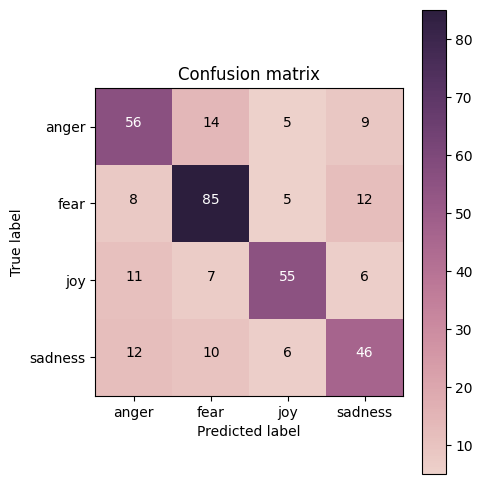


- The testing accuracy of this model is slightly better than that of the decision tree model
- As expected from the higher accuracy, the diagonal values in the confusion matrix are larger
- The common misclassifications for each true label differs:
    - anger is most often misclassified as fear
    - fear is most often misclassified as sadness
    - sadness and joy are most often misclassified as anger


In [36]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

e4_y_train = MultinomialNB().fit(X_train, y_train).predict(X_train)
e4_y_pred = MultinomialNB().fit(X_train, y_train).predict(X_test)
print(f"Naive Bayes training accuracy")
print(accuracy_score(y_true=y_train, y_pred=e4_y_train))
print(f"Testing accuracy")
print(accuracy_score(y_true=y_test, y_pred=e4_y_pred))
print("Classification report:")
print(classification_report(y_true=y_test, y_pred=e4_y_pred))
print("Confusion matrix:")
e4_cm = confusion_matrix(y_true=y_test, y_pred=e4_y_pred)
print(e4_cm)
plot_confusion_matrix(e4_cm, classes=my_tags)


display(
    Markdown("""
- The testing accuracy of this model is slightly better than that of the decision tree model
- As expected from the higher accuracy, the diagonal values in the confusion matrix are larger
- The common misclassifications for each true label differs:
    - anger is most often misclassified as fear
    - fear is most often misclassified as sadness
    - sadness and joy are most often misclassified as anger
""")
)


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [37]:
# Answer here
display(
    Markdown("""

# Result in comparison
             
- The training accuracy of the Naive Bayes model is way worse than that of the decision tree model
- The testing accuracy of the Naive Bayes model is slightly better than that of the decision tree model
- As expected from the higher accuracy, the diagonal values in the confusion matrix are larger
- The pattern of misclassifications is different this time:
    - anger is most often misclassified as fear
    - fear is most often misclassified as sadness
    - sadness and joy are most often misclassified as anger
             
# Why the differences?

- The Decision Tree model severely overfitted
    - For Decision Tree, training accuracy was 99%, while testing accuracy was only 65%. This means it memorized the training data, including the noises, and failed to generalize to test data
    - For Naive Bayes, the gap between 79% and 70% is much smaller, suggesting a much more generalized model

- Theoretical background covered in class
    - Decision Trees can become too complex if not limited, for example, by limiting their depth with pre-pruning or post-pruning approaches
    - For high-dimensional, sparse data, like text, this type of model can create a lot of specific rules that don't apply well to unseen text, causing them to overfit
    - Naive Bayes models are simpler models that directly aggregate probablitstic heuristics, based on the so called "Bayes Theorem", and the naive assumption that "all the attributes are conditionally independent, therefore we can just multiple all the probabilities that we know", which can act as a form of regularization, preventing them from fitting the training data, including the noises, in an overly-complex manner and make them more generalized.
        - Bayes Theorem can be stated as P(C|A) = P(A|C) * P(C) / P(A), which in our case correspond to P(emotion | text features) = (P(text features | emotion) * P(emotion)) / P(text features))
""")
)



# Result in comparison

- The training accuracy of the Naive Bayes model is way worse than that of the decision tree model
- The testing accuracy of the Naive Bayes model is slightly better than that of the decision tree model
- As expected from the higher accuracy, the diagonal values in the confusion matrix are larger
- The pattern of misclassifications is different this time:
    - anger is most often misclassified as fear
    - fear is most often misclassified as sadness
    - sadness and joy are most often misclassified as anger

# Why the differences?

- The Decision Tree model severely overfitted
    - For Decision Tree, training accuracy was 99%, while testing accuracy was only 65%. This means it memorized the training data, including the noises, and failed to generalize to test data
    - For Naive Bayes, the gap between 79% and 70% is much smaller, suggesting a much more generalized model

- Theoretical background covered in class
    - Decision Trees can become too complex if not limited, for example, by limiting their depth with pre-pruning or post-pruning approaches
    - For high-dimensional, sparse data, like text, this type of model can create a lot of specific rules that don't apply well to unseen text, causing them to overfit
    - Naive Bayes models are simpler models that directly aggregate probablitstic heuristics, based on the so called "Bayes Theorem", and the naive assumption that "all the attributes are conditionally independent, therefore we can just multiple all the probabilities that we know", which can act as a form of regularization, preventing them from fitting the training data, including the noises, in an overly-complex manner and make them more generalized.
        - Bayes Theorem can be stated as P(C|A) = P(A|C) * P(C) / P(A), which in our case correspond to P(emotion | text features) = (P(text features | emotion) * P(emotion)) / P(text features))


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

# I sure can

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [38]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df["text"])
y_train = train_df["emotion"]

X_test = BOW_500.transform(test_df["text"])
y_test = test_df["emotion"]

## check dimension is a good habbit
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

2025-11-02 09:57:44.576387: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-02 09:57:44.943012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-02 09:57:46.363304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
import keras

In [40]:
BOW_500.transform(test_df["text"])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4095 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [41]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print("check label: ", label_encoder.classes_)
print("\n## Before convert")
print("y_train[0:4]:\n", y_train[0:4])
print("\ny_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)


def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 349       anger
1516       fear
3423    sadness
2167        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [42]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print("\n\n## After convert")
print("y_train[0:4]:\n", y_train[0:4])
print("\ny_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [43]:
# I/O check
input_shape = X_train.shape[1]
print("input_shape: ", input_shape)

output_shape = len(label_encoder.classes_)
print("output_shape: ", output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape,))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# show model construction
model.summary()

I0000 00:00:1762048667.463455    4616 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [45]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("logs/training_log.csv")

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[csv_logger],
    validation_data=(X_test, y_test),
)
print("training finish")

Epoch 1/25


2025-11-02 09:57:48.944312: I external/local_xla/xla/service/service.cc:163] XLA service 0x7a064c003e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-02 09:57:48.944341: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2025-11-02 09:57:48.964304: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-02 09:57:49.061238: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-11-02 09:57:49.080139: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-02 09:57:

  1/113 ━━━━━━━━━━━━━━━━━━━━ 5:24 3s/step - accuracy: 0.1562 - loss: 1.4508

I0000 00:00:1762048671.283134    4847 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/113 ━━━━━━━━━━━━━━━━━━━━ 2s 576ms/step - accuracy: 0.3219 - loss: 1.3613

2025-11-02 09:58:53.592632: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.3231 - loss: 1.3604

2025-11-02 09:58:59.396922: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.


113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 618ms/step - accuracy: 0.3562 - loss: 1.3345 - val_accuracy: 0.4380 - val_loss: 1.2903
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 293ms/step - accuracy: 0.6261 - loss: 1.0152 - val_accuracy: 0.6427 - val_loss: 0.9445
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.7960 - loss: 0.5846 - val_accuracy: 0.6945 - val_loss: 0.7855
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.8519 - loss: 0.4123 - val_accuracy: 0.7032 - val_loss: 0.7921
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8796 - loss: 0.3212 - val_accuracy: 0.6888 - val_loss: 0.8408
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9084 - loss: 0.2626 - val_accuracy: 0.6916 - val_loss: 0.8827
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9300 - loss: 0.2109 - val_accuracy: 0.6715 - val_loss: 0.9687
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9452 - loss: 0.1764 - val_accurac

In [46]:
import tensorflow as tf

tf.test.gpu_device_name()


I0000 00:00:1762048873.659647    4616 gpu_device.cc:2020] Created device /device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


'/device:GPU:0'

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [47]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

2025-11-02 10:01:13.828274: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-02 10:01:14.098389: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18', 4 bytes spill stores, 4 bytes spill loads

2025-11-02 10:01:14.419706: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 104 bytes spill stores, 104 bytes spill loads



2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

2025-11-02 10:01:14.990272: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-02 10:01:15.425100: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 8 bytes spill stores, 8 bytes spill loads

2025-11-02 10:01:15.620376: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_25', 352 bytes spill stores, 352 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 664ms/step


array([[7.09251280e-09, 1.12500030e-03, 5.51073579e-03, 9.93364334e-01],
       [8.52769648e-04, 6.73418462e-01, 2.29560241e-01, 9.61685851e-02],
       [6.41859889e-01, 2.42662206e-01, 6.49585263e-06, 1.15471460e-01],
       [8.79088163e-01, 7.10362196e-02, 5.82120009e-03, 4.40544672e-02],
       [2.45415960e-02, 4.02567908e-03, 8.58322740e-01, 1.13109976e-01]],
      dtype=float32)

In [48]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'anger', 'anger', 'joy'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score

print(
    "testing accuracy: {}".format(
        round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)
    )
)

testing accuracy: 0.66


In [50]:
# Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.356214,1.334524,0.438040,1.290258
1,1,0.626073,1.015244,0.642651,0.944537
2,2,0.796014,0.584606,0.694524,0.785545
3,3,0.851924,0.412336,0.703170,0.792072
4,4,0.879601,0.321163,0.688761,0.840776
5,5,0.908386,0.262630,0.691643,0.882709
6,6,0.929975,0.210925,0.671470,0.968724
7,7,0.945198,0.176406,0.674352,1.005161
8,8,0.957930,0.153309,0.671470,1.060312
9,9,0.960697,0.127374,0.665706,1.133896


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


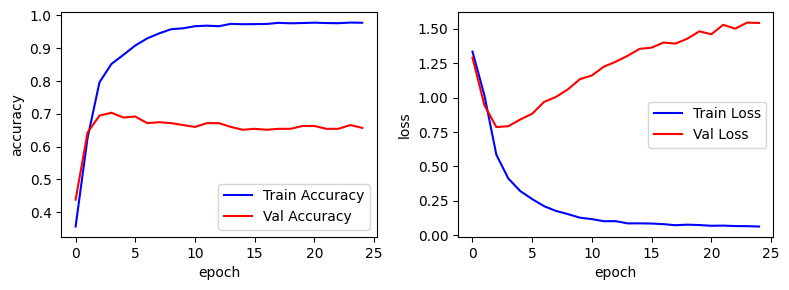


# How to interpret the graphs?

- The training accuracy (blue line in the first graph) consistently increases throughout the training process and become stable near 1.0. However, the validation accuracy (red line) increases for the first few epochs and then flattens and shows a slow decrease afterward. A gap forms and widens between the two.
- The training loss (blue line in the second graph) consistently decreases, showing the model is fitting the training data well. The validation loss (red line) decreases initially but start increasing again, throughout the rest of the training.

# How are they related to the concept of overfitting/underfitting covered in class?

- The graphs show a clear case of overfitting. The model is learning the training data very well (high training accuracy, low training loss) but is failing to generalize to the unseen validation data. The divergence between the curves in both graphs are the start of overfitting. The model has started to memorize the noise and specific patterns of the training set rather than learning the generalizable features.
- As for underfitting models, their graphs would show both low training and validation accuracy, with both loss curves remaining high, meaning the model is too simple to capture the patterns in the data.


In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
sns.lineplot(
    data=training_log,
    x="epoch",
    y="accuracy",
    ax=ax1,
    label="Train Accuracy",
    color="blue",
)
sns.lineplot(
    data=training_log,
    x="epoch",
    y="val_accuracy",
    ax=ax1,
    label="Val Accuracy",
    color="red",
)
sns.lineplot(
    data=training_log, x="epoch", y="loss", ax=ax2, label="Train Loss", color="blue"
)
sns.lineplot(
    data=training_log, x="epoch", y="val_loss", ax=ax2, label="Val Loss", color="red"
)

plt.tight_layout()
plt.show()

display(
    Markdown("""
# How to interpret the graphs?
             
- The training accuracy (blue line in the first graph) consistently increases throughout the training process and become stable near 1.0. However, the validation accuracy (red line) increases for the first few epochs and then flattens and shows a slow decrease afterward. A gap forms and widens between the two.
- The training loss (blue line in the second graph) consistently decreases, showing the model is fitting the training data well. The validation loss (red line) decreases initially but start increasing again, throughout the rest of the training.

# How are they related to the concept of overfitting/underfitting covered in class?
             
- The graphs show a clear case of overfitting. The model is learning the training data very well (high training accuracy, low training loss) but is failing to generalize to the unseen validation data. The divergence between the curves in both graphs are the start of overfitting. The model has started to memorize the noise and specific patterns of the training set rather than learning the generalizable features.
- As for underfitting models, their graphs would show both low training and validation accuracy, with both loss curves remaining high, meaning the model is too simple to capture the patterns in the data.
""")
)

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [78]:
## check library
import gensim

## ignore warnings
import warnings

warnings.filterwarnings("ignore")

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df["text_tokenized"] = train_df["text"].apply(lambda x: nltk.word_tokenize(x))
train_df[["id", "text", "text_tokenized"]].head()

,id,text,text_tokenized
349,10349,Forever angry that gh ruined Molly and morgan'...,"[Forever, angry, that, gh, ruined, Molly, and,..."
1516,20659,I have another test tonight,"[I, have, another, test, tonight]"
3423,40596,Some #people already talks about #Halloween \n...,"[Some, #, people, already, talks, about, #, Ha..."
2167,30163,It's a beautiful day today. Cloudy but sunny a...,"[It, 's, a, beautiful, day, today, ., Cloudy, ..."
3211,40384,The 2nd step to beating #anxiety or #depressio...,"[The, 2nd, step, to, beating, #, anxiety, or, ..."


In [79]:
## create the training corpus
training_corpus = train_df["text_tokenized"].values
training_corpus[:3]

array([list(['Forever', 'angry', 'that', 'gh', 'ruined', 'Molly', 'and', 'morgan', "'s", 'bond/friendship']),
       list(['I', 'have', 'another', 'test', 'tonight']),
       list(['Some', '#', 'people', 'already', 'talks', 'about', '#', 'Halloween', '\\nYou', "'ll", 'get', 'some', '#', 'dark', '#', 'music', 'to', 'go', 'with', 'it\\n', '#', 'gothic', '#', 'bloody', '#', 'HalloweenHorrorNights'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [83]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(
    sentences=training_corpus,
    vector_size=vector_dim,
    window=window_size,
    min_count=min_count,
    epochs=training_epochs,
)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [84]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv["happy"]
word_vec

array([ 6.5563536e-01,  4.3641311e-01, -8.4512569e-02,  5.0217789e-02,
        8.7288052e-02, -1.4538964e+00,  5.6923842e-01,  1.5132385e+00,
       -1.7531665e-01, -5.2144444e-01, -2.9313704e-01, -9.9729532e-01,
       -6.1506295e-01,  2.8403586e-01, -3.6093313e-02, -3.5550359e-01,
        5.1082450e-01, -2.1243189e-01,  7.7201329e-02, -8.4432000e-01,
        4.5324901e-01,  9.1864586e-01,  4.0121126e-01, -1.5200433e-01,
        3.4151980e-01, -7.7241436e-02, -8.2815760e-01,  6.1901641e-01,
       -3.2536605e-01, -1.9564459e-01,  5.2346373e-01, -1.4983089e-01,
        5.7556015e-01, -7.2780222e-01, -4.9105513e-01,  3.6977547e-01,
        2.7602491e-01, -5.4307580e-02, -4.1628990e-01, -6.2824470e-01,
        2.4423768e-01,  6.8707531e-03, -3.8562912e-01,  3.5348329e-01,
        7.0065141e-01, -3.7449740e-02, -8.9515883e-01, -8.5274968e-03,
        2.4756777e-01,  4.3155304e-01, -2.0301245e-01, -6.9018900e-01,
       -2.8830424e-01,  4.3333834e-04, -6.7135304e-01, -4.0079635e-01,
      

In [85]:
# Get the most similar words
word = "happy"
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.919357419013977),
 ('Be', 0.9171810150146484),
 ('kinda', 0.9093961119651794),
 ('real', 0.9091536402702332),
 ('blessed', 0.9062387943267822),
 ('cry', 0.9046212434768677),
 ('infuriate', 0.9045844078063965),
 ('yet', 0.9044688940048218),
 ('bear', 0.9035525918006897),
 ('folks', 0.9010930061340332)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [86]:
from gensim.models import KeyedVectors

# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("load ok")

w2v_google_model.most_similar("happy", topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [87]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print("load ok")

glove_twitter_25_model.most_similar("happy", topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [88]:
w2v_google_model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [109]:
# Answer here
display(
    Markdown("""
- We can combine the vectors of the words in each sentence into a single vector, and, proceed to use them as features to train our models

- We can do that by:
    1. Taking the average of all the word vectors in a sentence, element-wise. This produce a single "sentence vector" that might capture the overall meaning.
    2. We can also just sum up all the word vectors, element-wise. This give more weight to longer input.
    3. We can also give more weight to more important words by using tf-idf scores as the weights for each word before averaging them or summing them.
""")
)


- We can combine the vectors of the words in each sentence into a single vector, and, proceed to use them as features to train our models

- We can do that by:
    1. Taking the average of all the word vectors in a sentence, element-wise. This produce a single "sentence vector" that might capture the overall meaning.
    2. We can also just sum up all the word vectors, element-wise. This give more weight to longer input.
    3. We can also give more weight to more important words by using tf-idf scores as the weights for each word before averaging them or summing them.


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [91]:
# clustering target
target_list = ["happy", "fear", "angry", "car", "teacher", "computer"]
print("target words: ", target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [92]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print("word: {} \t cluster: {}".format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [93]:
# check cluster membership
word = "student"
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [94]:
# check cluster membership
word = "sad"
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [99]:
word_list = ["happy", "angry", "data", "mining"]

topn = 5
happy_words = ["happy"] + [
    word_ for word_, sim_ in w2v_google_model.most_similar("happy", topn=topn)
]
angry_words = ["angry"] + [
    word_ for word_, sim_ in w2v_google_model.most_similar("angry", topn=topn)
]
data_words = ["data"] + [
    word_ for word_, sim_ in w2v_google_model.most_similar("data", topn=topn)
]
mining_words = ["mining"] + [
    word_ for word_, sim_ in w2v_google_model.most_similar("mining", topn=topn)
]

print("happy_words: ", happy_words)
print("angry_words: ", angry_words)
print("data_words: ", data_words)
print("mining_words: ", mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print("\ntarget words: ")
print(target_words)

print("\ncolor list:")
cn = topn + 1
color = ["b"] * cn + ["g"] * cn + ["r"] * cn + ["y"] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

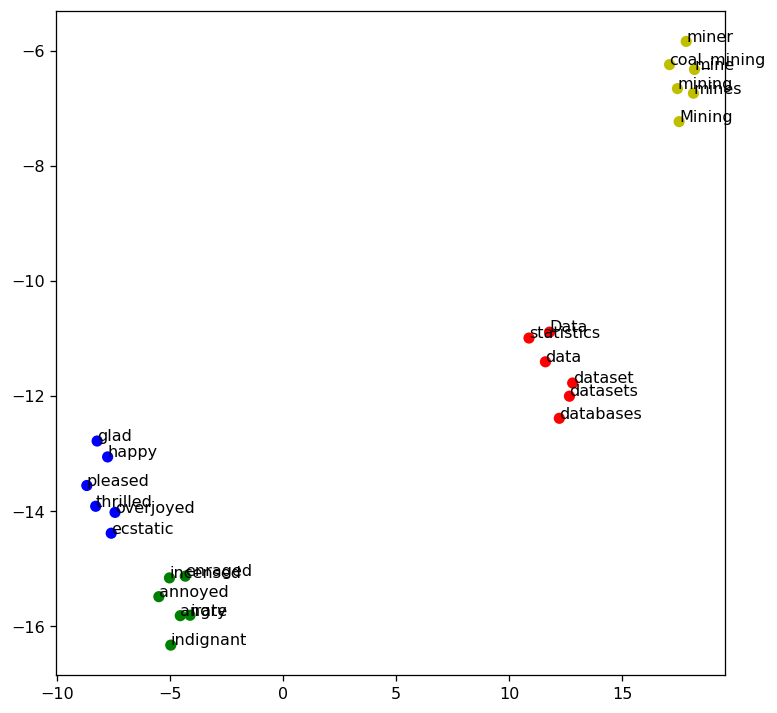

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric="cosine", random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

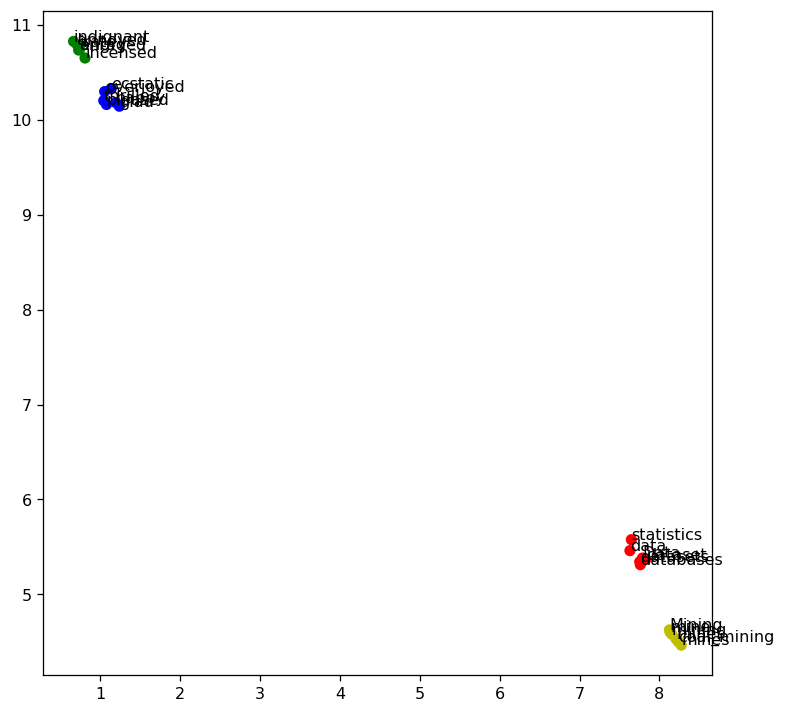

In [101]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric="cosine", random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

t-SNE plot


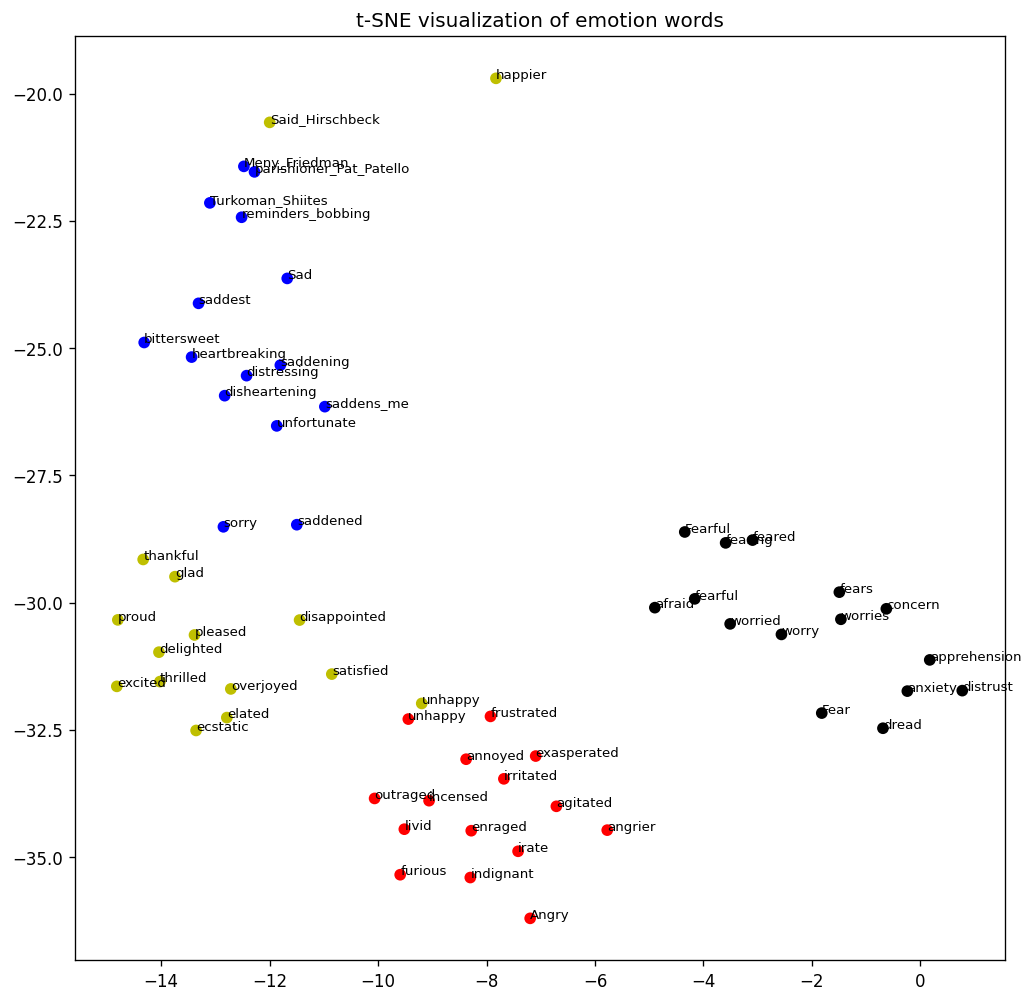

UMAP plot


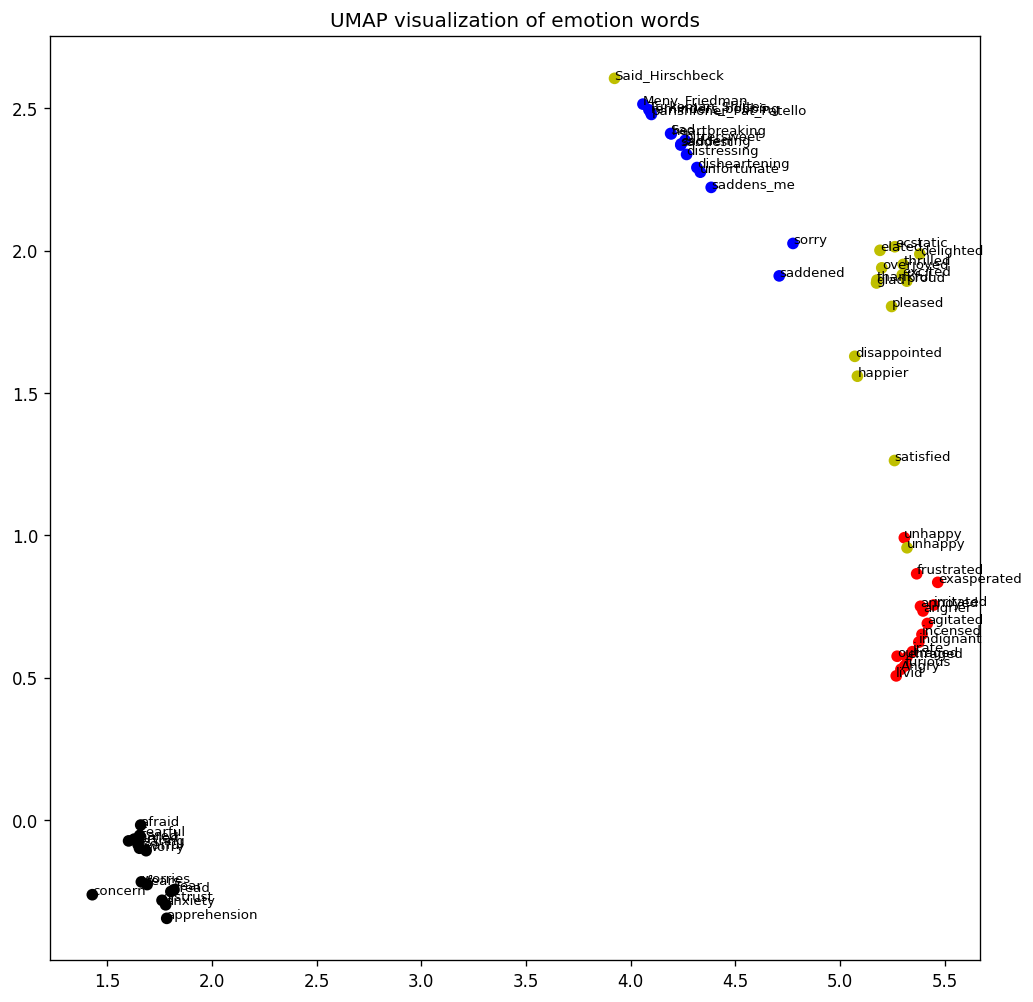


- Both models can group the words into their respective categories well
- The clusters in the UMAP plot are tighter and more compact
- The vectors in UMAP clusters form lines
- UMAP is known to preserve some global structure? I am not sure why the "angry", "happy" and "sad" groups are closer to each other than the "fear" group


In [ ]:
# Answer here

seed_words = ["angry", "happy", "sad", "fear"]
topn = 15
colors = ["r", "y", "b", "black"]

target_words = [
    w for word in seed_words for w, _ in w2v_google_model.most_similar(word, topn=topn)
]
color_list = []
for i in range(len(seed_words)):
    color_list += [colors[i]] * topn

model = w2v_google_model
size = 500
target_size = len(target_words)
X_train = model[target_words + list(model.index_to_key)[:size]]

# t-SNE
print("t-SNE plot")
X_tsne = TSNE(
    n_components=2, metric="cosine", random_state=42, perplexity=30
).fit_transform(X_train)
plt.figure(figsize=(10, 10), dpi=120)
plt.title("t-SNE visualization of emotion words")
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color_list)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(
        label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=8
    )
plt.show()


# UMAP
print("UMAP plot")
X_umap = umap.UMAP(
    n_components=2, metric="cosine", random_state=42, n_neighbors=10, min_dist=0.1
).fit_transform(X_train)
plt.figure(figsize=(10, 10), dpi=120)
plt.title("UMAP visualization of emotion words")
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color_list)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(
        label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=8
    )
plt.show()


display(
    Markdown("""
- Both models can group the words into their respective categories well
- The clusters in the UMAP plot are tighter and more compact
- The vectors in UMAP clusters form lines
- UMAP is known to preserve some global structure? I am not sure why the "angry", "happy" and "sad" groups are closer to each other than the "fear" group
""")
)

---